My Libaray Imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Anime Dataset

In [9]:
# Dataset Introdution
print("Data Source: MyAnimeList (kaggle.com/CooperUnion/anime-recommendations-database)")
print("Target: Predict ratings (0-10) using popularity and anime type")

# Load the data
anime = pd.read_csv('anime.csv')

# Cleaning the data
anime = anime.dropna(subset=['rating'])
anime = anime[anime['rating'] != 'Unknown']

# Displaying the basic info
print(anime.head())

Data Source: MyAnimeList (kaggle.com/CooperUnion/anime-recommendations-database)
Target: Predict ratings (0-10) using popularity and anime type
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


Exploring the Anime Dataset while using a Stats Summary

MISSING VALUES:
 genre    47
dtype: int64


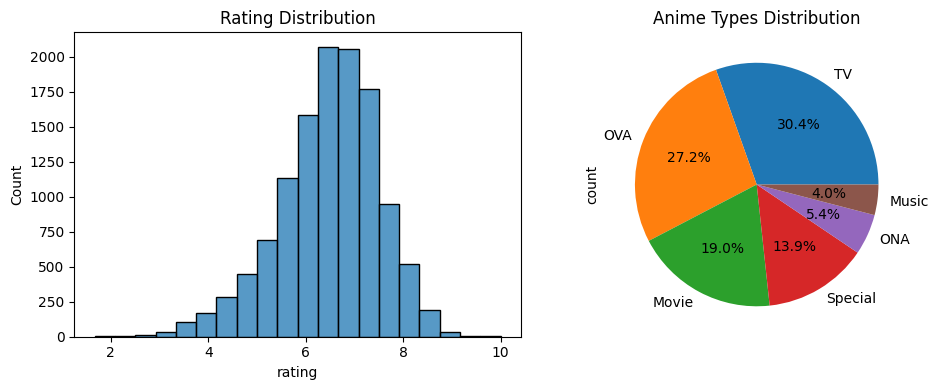

In [4]:
# Missing values analysis
missing = anime.isnull().sum()
print("MISSING VALUES:\n", missing[missing > 0])

# Target variable analysis
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(anime['rating'].dropna(), bins=20)
plt.title('Rating Distribution')

# Categorical feature analysis
plt.subplot(1,2,2)
anime['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Anime Types Distribution')
plt.tight_layout()
plt.show()

Analysizing rating and trying see correlations

In [11]:
# Cleaning the data
anime['rating'] = pd.to_numeric(anime['rating'])
anime['members'] = pd.to_numeric(anime['members'])
anime = anime.dropna(subset=['rating', 'members'])

# Compare ratings
tv_ratings = anime[anime['type'] == 'TV']['rating']
movie_ratings = anime[anime['type'] == 'Movie']['rating']

print(f"TV average rating: {tv_ratings.mean():.1f}")
print(f"Movie average rating: {movie_ratings.mean():.1f}")

_, p_value = stats.ttest_ind(tv_ratings, movie_ratings, nan_policy='omit')
print(f"\nStatistical Significance Test:")
print(f"TV vs Movie p-value: {p_value:.4f} {'(Significant)' if p_value < 0.05 else '(Not significant)'}")

TV average rating: 6.9
Movie average rating: 6.3

Statistical Significance Test:
TV vs Movie p-value: 0.0000 (Significant)


Predicting Rating of a new Anime

In [15]:
# Prepare data - with cleaning
anime['is_TV'] = (anime['type'] == 'TV').astype(int)

# Convert to numeric and drop bad values
X = anime[['is_TV', 'members', 'episodes']].copy()
X['members'] = pd.to_numeric(X['members'], errors='coerce')
X['episodes'] = pd.to_numeric(X['episodes'], errors='coerce')
X = X.dropna()
y = anime.loc[X.index, 'rating']  # Match y with cleaned

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, predictions):.2f}")
print(pd.DataFrame({'Actual': y_test.head(), 'Predicted': predictions[:5].round(1)}))

# Predict new anime
print(f"New prediction: {model.predict([[1, 50000, 12]])[0]:.1f}/10")

MAE: 0.60
      Actual  Predicted
6405    6.13        6.2
5683    6.38        6.5
4817    6.63        7.1
2486    7.25        6.8
2196    7.33        7.1
New prediction: 7.1/10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
